<h1> Histogram YN vs. OE </h1>

In [2]:
# gensim modules
from __future__ import division
from gensim import utils
from gensim.models.doc2vec import LabeledSentence, TaggedDocument
from gensim.models import Doc2Vec

# numpy
import numpy as np
import re

import matplotlib as mpl

from collections import defaultdict

%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 24})

Populating the interactive namespace from numpy and matplotlib


In [3]:
import psycopg2
conn = psycopg2.connect("host=localhost port=5432 dbname=qa")
cur = conn.cursor()
#connect to db and find q/a
#cur.execute("SELECT question from qa;")
#Qresults=cur.fetchall()
#cur.execute("SELECT answer from qa;")
#Aresults=cur.fetchall()

In [4]:
cur.execute("SELECT question from qa WHERE questiontype  = 'yes/no';")
Q_yn=cur.fetchall()
cur.execute("SELECT question from qa WHERE questiontype  = 'open-ended';")
Q_oe=cur.fetchall()

In [5]:
def process_line(sentence):
    #step 1 split if we need to
    sentences=re.split(r'[;:!?.-]\s*', sentence)
    result= [re.findall("[a-z']+", sent.lower()) for sent in sentences if \
           re.findall("[a-z']+", sent.lower())!=[]]
    if result==[]:
        result=['']
    return result
stoplist = set('for a of the and to in rt'.split())

<h1> clean up inputs </h1>

In [6]:
qs_yn= [[word for word in process_line(sentence[0])[0] if word not in stoplist] for sentence in Q_yn]
#qs_yn_sample=qs_yn[:int(len(qs_yn)/2)]
qs_oe= [[word for word in process_line(sentence[0])[0] if word not in stoplist] for sentence in Q_oe]
#qs_oe_sample=qs_oe[:int(len(qs_oe)/2)]

<h1> build histogram for the first word in the sentence </h1>

In [7]:
S_yn=defaultdict(lambda:0)
S_oe=defaultdict(lambda:0)

In [8]:
for words in qs_yn:
    try:
        S_yn[words[0]]+=1
    except IndexError:
        a=1
        
for words in qs_oe:
    try:
        S_oe[words[0]]+=1
    except IndexError:
        a=1

<h1> Misslabeled Open Ended Questions </h1>

In [102]:
for words in qs_oe:
    if words[0]=='can':
        print(' '.join(words))

can you play thrash or speed metal on this amp
can anyone please tell me what piano repertoire songs are on yamaha np
can you use its usb connect your laptop while recording
can this unit handle true v phantom ribbon mics 's or u
can it be just used as regular mic
can this be played out loud as synthesizer
can i connect bass guitar this mixer
can this unit be used mic drum kit mix mp play along tracks so both can be heard thru head phones powered monitor
can i fit board x
can i use mixer's main out go straight into kt 's inst inputs
can i connect an ipod or any device this playback
can i hook up two wireless microphones it at time or is capacity only one
can i play it without connecting computer
can someone tell me what idk means
can this device be used effectively tune room
can i put this mic normal mic stand
can anyone tell me if g
can anyone tell me how long this would last with battery
can i add boost pedal my solos or pre amp pedal
can anyone confirm that g is low g not high g
can

IndexError: list index out of range

In [104]:
for words in qs_oe:
    if words[0]=='does':
        print(' '.join(words))

does this switch require one or two cables
does this have male pins or female holes
does this unit just record or does it also playback compact discs
does this adapter work with mk
does this support multi
does roland cube street two
does anyone know if peg that comes with this stand is same as hercules ds b flute clarinetinet peg http
does anyone know if this will fit flesch flat center
does usb cord function as midi connector or do i need separate additional midi cords
does this come with mocrophone will it work with sure pgx transmitter
does this lap steel have adjustable bridge
does it come with cable
does this work as di box as well
does this box have an on off button or do you have replug it each time
does system come with battery or do you have order battery separately
does this amp have rca inputs i can run my ipad into will it work well with pair watt pa speakers
does this come with power cord or do you have buy that
does acoustic guitar sound good on this or it just keyboards


IndexError: list index out of range

<h1> Properly labeled </h1>

In [106]:
for words in qs_yn:
    if words[0]=='does':
        print(' '.join(words))

does this work bass
does it work on
does this bag fit fender kingman acoustic dreadnought bass guitar
does this piano work with midi cord connect internet
does it works with boss rc
does it come with cable s
does this work with vox
does wire have memory ie is it hard straighten
does this wire holds its shape
does this wire holds its shape
does it have knot strap
does this shockmount work with audio technica at
does this psm shock mount fit at
does this fit rode ntk
does this work with electro voice re
does it work rode nt
does this require phantom v power
does this microphone work with an iphone
does any body use theses master slave mode
does yamaha pa volt power adapter work with psre keyboard
does this work on yamaha psr
does yamaha pa volt power adapter work with psre keyboard
does yamaha pa volt power adapter work with psre keyboard
does it work with yamaha psr
does amp come with headphone output jack private playing
does amp come with distortion
does it have distortion
does it com

IndexError: list index out of range

<h1> Most common first word </h1>

In [9]:
arr_yn=numpy.array([[key,val] for (key,val) in S_yn.iteritems()])
arr_oe=numpy.array([[key,val] for (key,val) in S_oe.iteritems()])

In [10]:
arr_yn[argsort(arr_yn[:,1].astype(int))[::-1]][:10][:,0].tolist()

['does', 'is', 'will', 'can', 'i', 'do', 'are', 'would', 'has', 'my']

In [211]:
arr_yn[argsort(arr_yn[:,1].astype(int))[::-1]][:10]

array([['does', '152949'],
       ['is', '117469'],
       ['will', '111151'],
       ['can', '100414'],
       ['i', '38724'],
       ['do', '32623'],
       ['are', '26504'],
       ['would', '17381'],
       ['has', '7907'],
       ['my', '6763']], 
      dtype='|S16')

<h1> Hist top 10 words in each and build a list to overlay </h1>

In [12]:
xx_oe=arr_oe[argsort(arr_oe[:,1].astype(int))[::-1]][:10][:,0]
xx_yn=arr_yn[argsort(arr_yn[:,1].astype(int))[::-1]][:10][:,0]
common_first_words=list(set(xx_oe.tolist()+xx_yn.tolist()))

In [13]:
yy_oe=[S_oe[word] for word in common_first_words]
yy_yn=[S_yn[word] for word in common_first_words]

In [14]:
#sort by top y/n response
sorted_index=[yy_yn.index(x) for x in sorted(yy_yn)][::-1]
sorted_index
common_first_words=[common_first_words[ii] for ii in sorted_index]
common_first_words
yy_oe=[yy_oe[ii] for ii in sorted_index]
yy_yn=[yy_yn[ii] for ii in sorted_index]

/Users/attiladobi/anaconda2/lib/python2.7/site-packages/matplotlib/legend.py:325: UserWarning: Unrecognized location "upper middle". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  six.iterkeys(self.codes))))


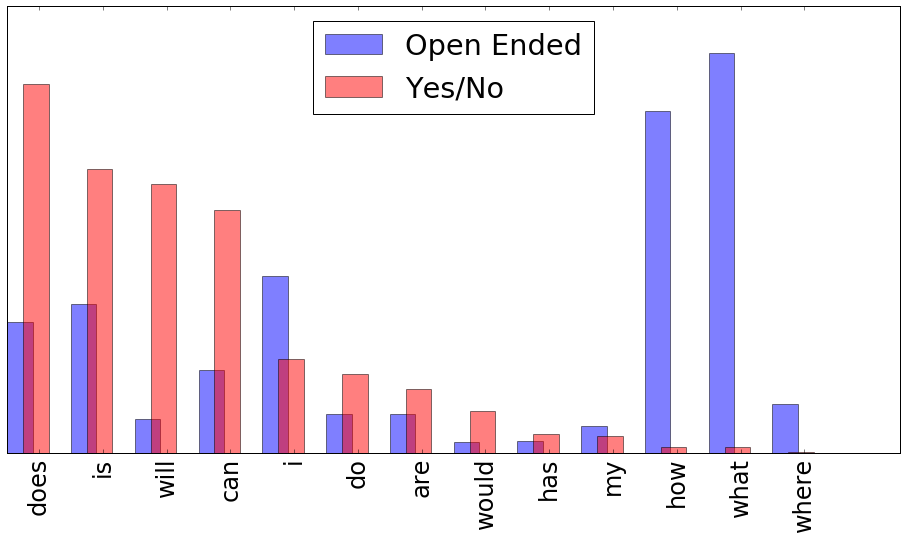

In [16]:
xx=np.arange(len(common_first_words))
plt.bar(xx,yy_oe/sum(yy_oe),color='b',alpha=0.5, width=0.4,label='Open Ended')
plt.bar(xx+.25,yy_yn/sum(yy_yn),color='r',alpha=0.5,width=0.4, label='Yes/No')
plt.xticks(xx+1/2, common_first_words, rotation='vertical')
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.legend(loc='upper middle')

In [25]:
bag_of_words_yn="is,will,wil,may,might,does,dose,doe,dos,do,can,could,must,should,are,would,do,did,what,what's".split(',')
bag_of_words_oe="what,what's".split(',')

In [26]:
a=set(bag_of_words_yn)
b=set(bag_of_words_oe)

In [29]:
'what' in b

True